In [4]:
# common packages 
import numpy as np 
import os
import copy
from math import *
from PIL import _imaging
import matplotlib.pyplot as plt
from functools import reduce
# reading in dicom files
import pydicom
# skimage image processing packages
from skimage import measure, morphology
from skimage.morphology import ball, binary_closing
from skimage.measure import label, regionprops
# scipy linear algebra functions 
from scipy.linalg import norm
import scipy.ndimage
# ipywidgets for some interactive plots
from ipywidgets.widgets import * 
import ipywidgets as widgets
# plotly 3D interactive graphs 
import plotly
from plotly.graph_objs import *


In [5]:
#Understanding the metadata in the provided dicom images
test_scan = pydicom.read_file('../train/ID00007637202177411956430/1.dcm')
test_scan

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 2.25.12297650151329871895440507938349160734
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.1
(0002, 0013) Implementation Version Name         SH: 'OSIRIX_361'
(0002, 0016) Source Application Entity Title     AE: 'ANONYMOUS'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0018) SOP Instance UID                    UI: 2.25.12297650151329871895440507938349160734
(0008, 0060) Modality                            CS: 'CT'
(0008, 0070) 

In [6]:
#Understanding the pixel data
rows = test_scan.Rows
columns = test_scan.Columns
pixel_spacing = test_scan.PixelSpacing
print("Rows: {rows} , Columns: {columns} and Pixel Spacing: {pixel_spacing}".format(rows=rows,columns=columns,pixel_spacing=pixel_spacing) )

Rows: 512 , Columns: 512 and Pixel Spacing: [0.652344, 0.652344]


In [7]:
help(plt.imshow)

Help on function imshow in module matplotlib.pyplot:

imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, *, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)
    Display data as an image, i.e., on a 2D regular raster.
    
    The input may either be actual RGB(A) data, or 2D scalar data, which
    will be rendered as a pseudocolor image. For displaying a grayscale
    image set up the color mapping using the parameters
    ``cmap='gray', vmin=0, vmax=255``.
    
    The number of pixels used to render an image is set by the axes size
    and the *dpi* of the figure. This can lead to aliasing artifacts when
    the image is resampled because the displayed image size will usually
    not match the size of *X* (see
    :doc:`/gallery/images_contours_and_fields/image_antialiasing`).
    The resampling can be controlled via the *interpolation* parameter
    and/or :rc:`image.interpolation`

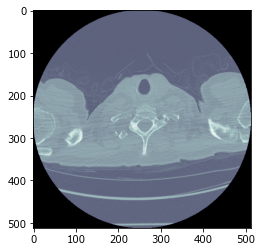

In [8]:
#Displaying Sample Image
plt.imshow(test_scan.pixel_array, cmap=plt.cm.bone)

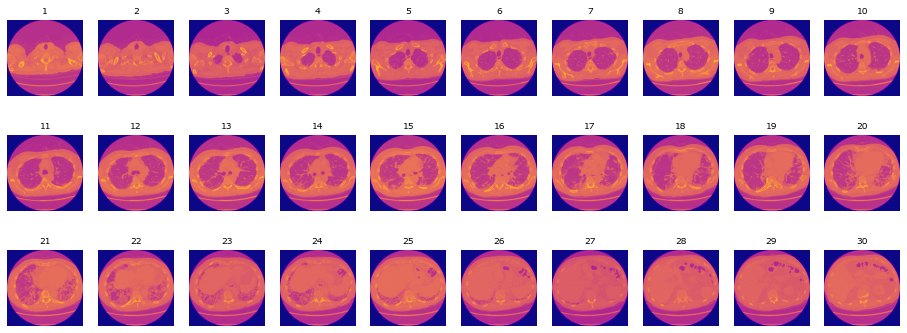

In [9]:
#reading all dicom files for a patient
import re
datasets=[]
def display_dcm(patient_dir):
    patient_dir = '../train/'+ patient_dir
    # First Order the files in the dataset
    files = []
    for dcm in list(os.listdir(patient_dir)):
        files.append(dcm) 
    files.sort(key=lambda f: int(re.sub('\D', '', f)))

    # Read in the Dataset
    for dcm in files:
        path = patient_dir + "/" + dcm
        datasets.append(pydicom.dcmread(path))

    # Plot the images
    fig=plt.figure(figsize=(16, 6))
    columns = 10
    rows = 3

    for i in range(1,columns*rows +1):
        img = datasets[i-1].pixel_array
        fig.add_subplot(rows, columns, i)
        plt.imshow(img, cmap="plasma")
        plt.title(i, fontsize = 9)
        plt.axis('off');
        
display_dcm("ID00007637202177411956430") 

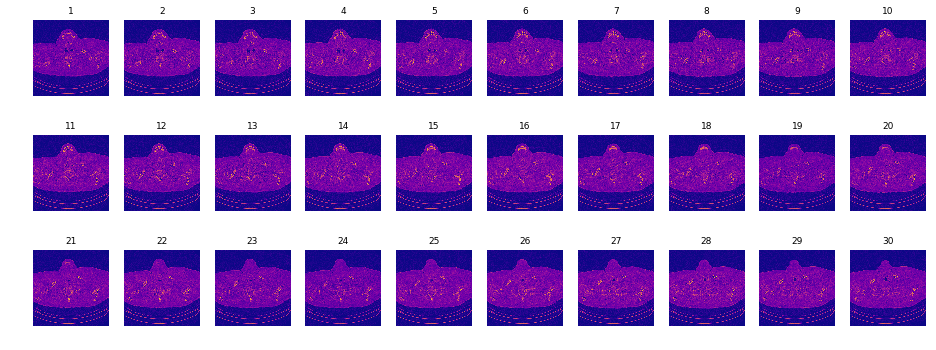

In [22]:
#reading all dicom files for a patient
datasets=[]
def display_dcm(patient_dir):
    patient_dir = '../train/'+ patient_dir
    # First Order the files in the dataset
    files = []
    for dcm in list(os.listdir(patient_dir)):
        files.append(dcm) 
    files.sort(key=lambda f: int(re.sub('\D', '', f)))

    # Read in the Dataset
    for dcm in files:
        path = patient_dir + "/" + dcm
        datasets.append(pydicom.dcmread(path))

    # Plot the images
    fig=plt.figure(figsize=(16, 6))
    columns = 10
    rows = 3

    for i in range(1,columns*rows +1):
        img = datasets[i-1].pixel_array
        fig.add_subplot(rows, columns, i)
        plt.imshow(img, cmap="plasma")
        plt.title(i, fontsize = 9)
        plt.axis('off');
        
display_dcm("ID00009637202177434476278") 